In [1]:
import pandas as pd
import numpy as np

In [2]:
meta = ["recovered", "confirmed","deaths"]
data = [pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{}_global.csv".format(i),error_bad_lines=False)  for i in meta]

In [3]:
scope = ["Italy","Spain","Turkey","Germany","Iran"]

In [4]:
limit = len(data[2].columns)

In [5]:
scopeData = []

for i in scope:
    data_ = data[2][data[2]["Country/Region"] == i].iloc[: , list(range(4,limit))].transpose().reset_index()
    data_.columns = ["Date","Quantity"]
    scopeData.append(data_)

In [6]:
Italy  = scopeData[0][scopeData[0].Quantity != 0].reset_index(drop=True)
Spain  = scopeData[1][scopeData[1].Quantity != 0].reset_index(drop=True)
#Iran   = scopeData[2][scopeData[2].Quantity != 0].reset_index(drop=True)
Turkey = scopeData[2][scopeData[2].Quantity != 0].reset_index(drop=True)
Germany = scopeData[3][scopeData[3].Quantity != 0].reset_index(drop=True)
Iran = scopeData[4][scopeData[4].Quantity != 0].reset_index(drop=True)
#Portugal = scopeData[5][scopeData[5].Quantity != 0].reset_index(drop=True)

In [8]:
withoutZerosData = [Italy,Spain,Turkey,Germany,Iran]

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)

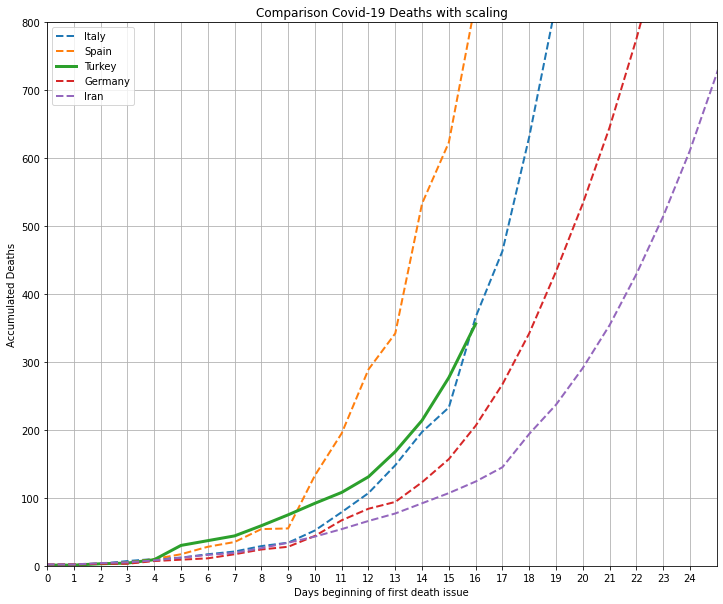

In [14]:
c=0
for i in withoutZerosData:
    
    if c ==2:
        plt.plot(i.index,i.Quantity,linewidth=3)
        c +=1
    else:    
        plt.plot(i.index,i.Quantity,linewidth=2,linestyle="--")
        plt.ylim(0,800)
        plt.xlim(0,25)
        plt.xticks(np.arange(0, 25, step=1))
        c +=1
plt.legend( scope)
plt.title("Comparison Covid-19 Deaths with scaling")
plt.xlabel("Days beginning of first death issue")
plt.ylabel("Accumulated Deaths")
plt.grid()


   

In [12]:
x = pd.DataFrame([["4/02/20",356]],columns=["Date","Quantity"])

In [13]:
withoutZerosData[2]= withoutZerosData[2].append(x,ignore_index=True)